# Object Detection

In [30]:
# imports 
import torch 
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

# setting
torch.cuda.empty_cache()
%matplotlib inline 

In [31]:
# close repository
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [32]:
# load model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')

Using cache found in C:\Users\hami/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-13 Python-3.10.4 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 336x1000 18 persons, 8 cars, 1 bus, 5 traffic lights, 1 backpack
Speed: 9.0ms pre-process, 112.2ms inference, 2.0ms NMS per image at shape (1, 3, 224, 640)


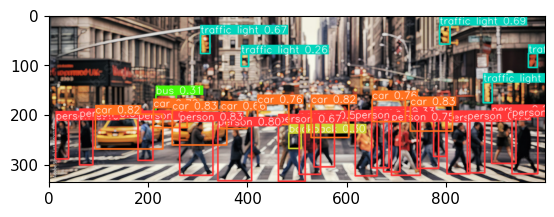

In [33]:
# apply model on image 
img = 'test.png'
results = model(img)
print(results)
plt.imshow(np.squeeze(results.render()))
plt.show()

In [34]:
# webcam
cap = cv2.VideoCapture(0) # activates the webcam 
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break 
        
cap.release()
cv2.destroyAllWindows()